In [1]:
%matplotlib inline

import setGPU

import os, h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize

import glob

setGPU: Setting GPU to: 1


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def plotHistogram(real_sum, generated_sum, epoch, bins=7):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.hist(real_sum, alpha=0.3, bins=bins, label='real sum', color='blue')
    ax.hist(generated_sum, alpha=0.3, bins=bins, label='generated sum', color='red')
    plt.legend(prop={'size': 15})
    plt.title("Sum of energies - epoch " + str(epoch), size=16)
    ax.set_xlabel('Energy (GeV)', size=16)
    ax.set_ylabel('n events', size=16)
    #plt.show()
    #plt.savefig('images/pred_%s.png'%epoch)

In [3]:
def loadModel(name, weights=False):
    '''
    Adapted from Kaustuv Datta and Jayesh Mahapatra's CaloImageMacros.
    Loads models from json file.
    :parameter name: name of the json file.
    :type name: str
    :parameter weights: whether or not to load the weights.
    :type weights: bool
    :return: loaded model.
    '''
    from keras.models import model_from_json
    json_file = open('%s' % name, 'r')
    loaded = json_file.read()
    json_file.close()

    model = model_from_json(loaded)

    # load weights into new model
    if weights == True:
        model.load_weights('%s.h5' % name)
    # print(model.summary())

    #print("Loaded model from disk")
    return model

In [4]:
n_samples = 200

In [5]:
f = h5py.File('/bigdata/shared/HGCAL_data/new/all_noPU.h5', 'r')
X = np.asarray(f['X'])
X = X.squeeze()
inp_sum = np.sum(X[0:n_samples], axis = (1, 2, 3))

In [6]:
latent_space=100
noise = np.random.normal(0, 1, (n_samples, latent_space))

In [7]:
all_g_weight1 = '/nfshome/vitoriabp/Keras-GAN/wgan/trial2_batch_size_32_epochs_4000/weights/generator_weights_epoch_*.h5'
gen_model1 = '/nfshome/vitoriabp/Keras-GAN/wgan/trial2_batch_size_32_epochs_4000/weights/generator_modeltrial2.json'

In [7]:
all_g_weight1 = '/nfshome/vitoriabp/hgcal_wgan/trial18/weights/generator_weights_epoch_*.h5'
gen_model1 = '/nfshome/vitoriabp/hgcal_wgan/trial18/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01_shuffle.json'

In [8]:
def plotHist(all_g_weight, gen_model):
    g = loadModel(gen_model)

    for w in glob.glob(all_g_weight):
        epoch = w.split('/')[-1].split('_')[3]
        g.load_weights(w)
        generated_images = g.predict(noise)
        generated_images = generated_images.squeeze()
        gen_sum = np.sum(generated_images, axis=(1, 2, 3))
        plotHistogram(inp_sum, gen_sum, epoch, bins = 10)

Using TensorFlow backend.


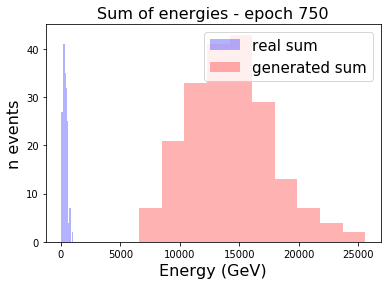

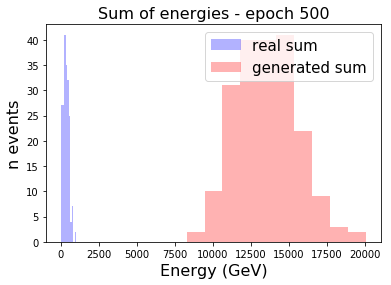

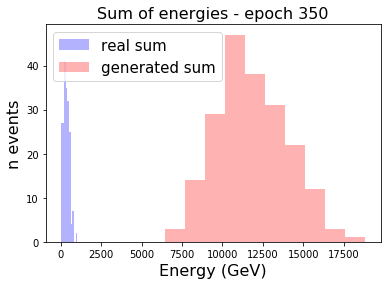

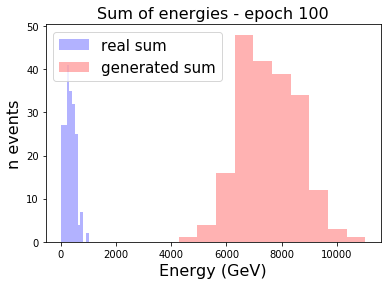

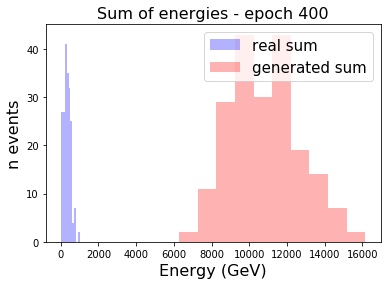

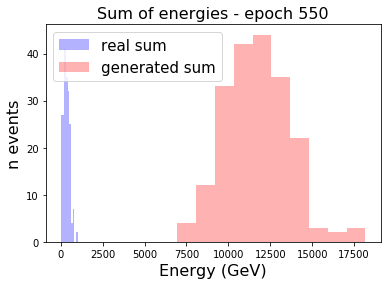

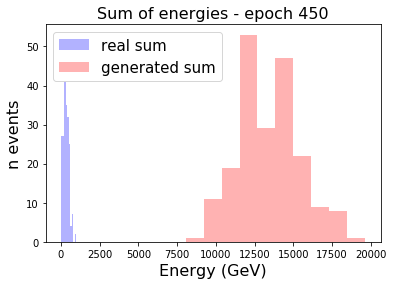

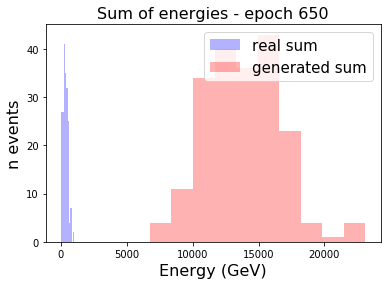

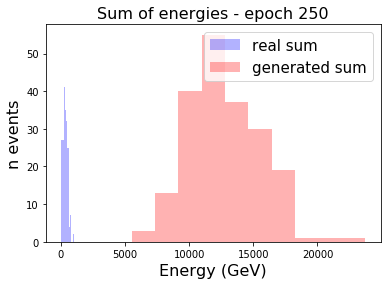

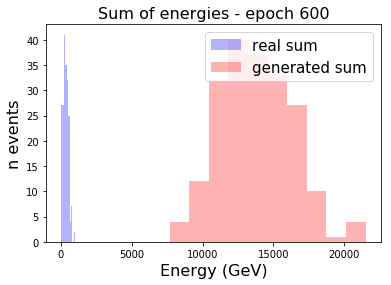

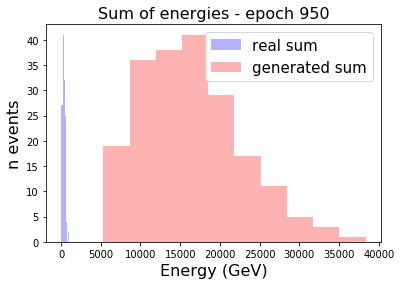

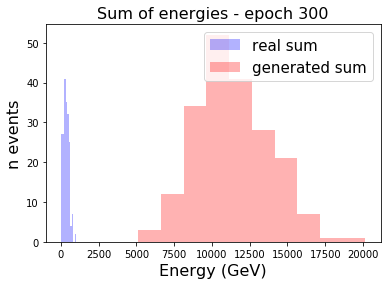

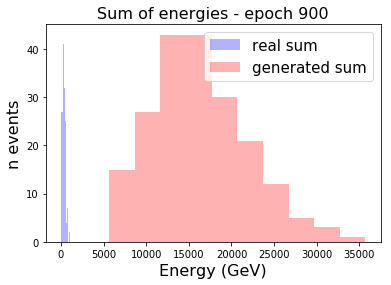

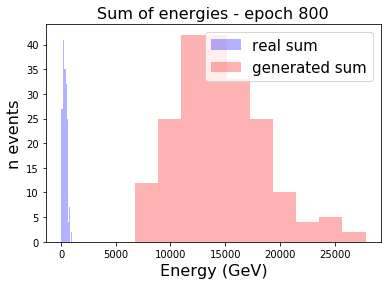

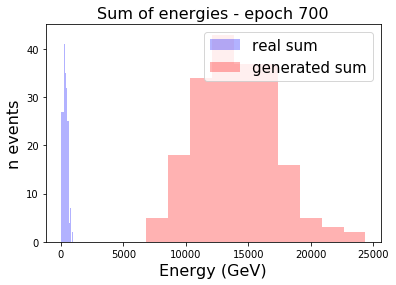

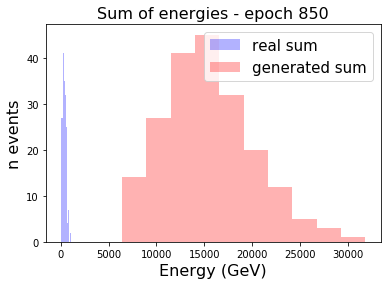

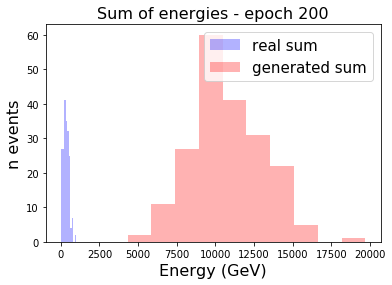

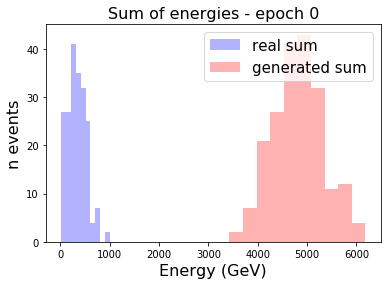

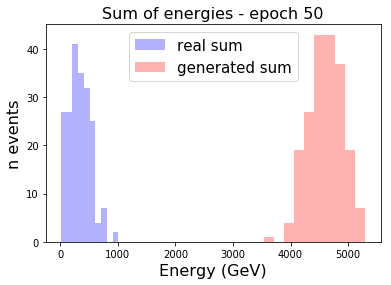

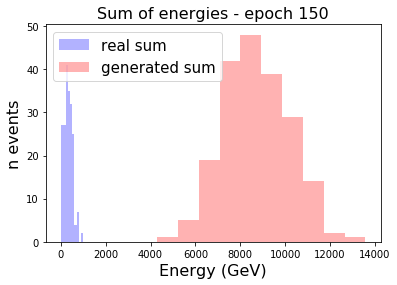

In [9]:
plotHist(all_g_weight1, gen_model1)

In [10]:
all_g_weight2 = '/nfshome/vitoriabp/Keras-GAN/wgan/trial3_batch_size_128_epochs_2000/weights/generator_weights_epoch_*.h5'
gen_model2 = '/nfshome/vitoriabp/Keras-GAN/wgan/trial3_batch_size_128_epochs_2000/weights/generator_modeltrial3_bs_128.json'

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


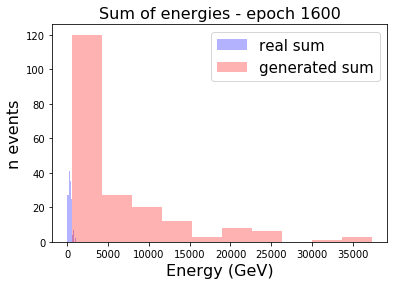

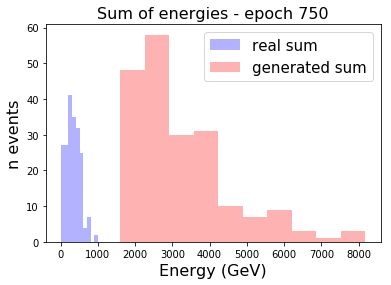

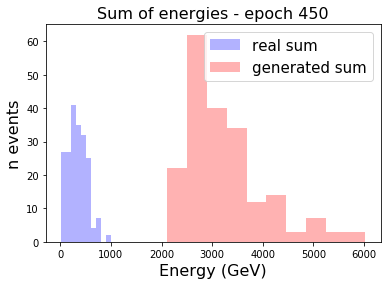

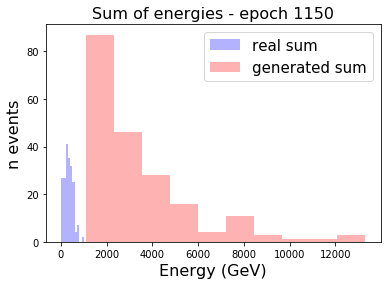

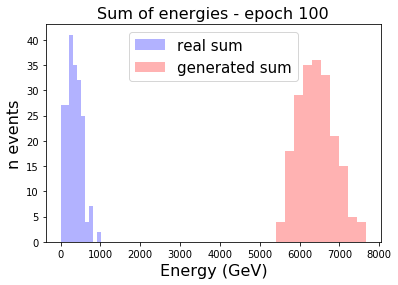

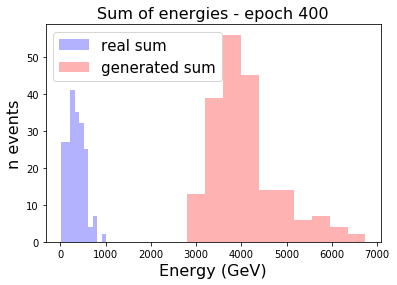

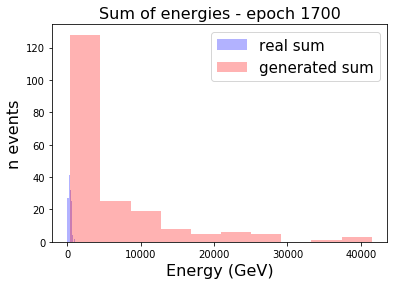

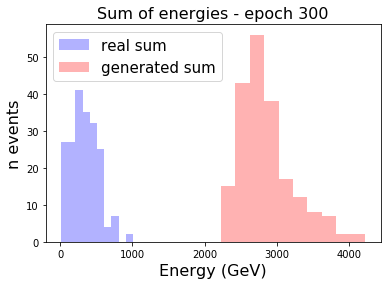

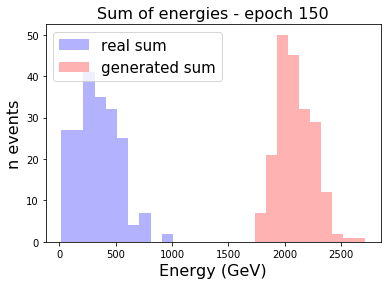

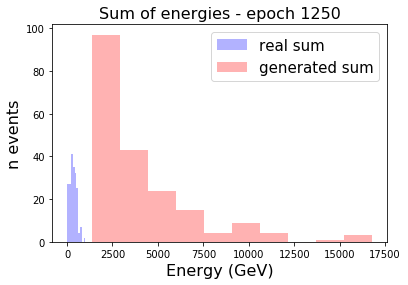

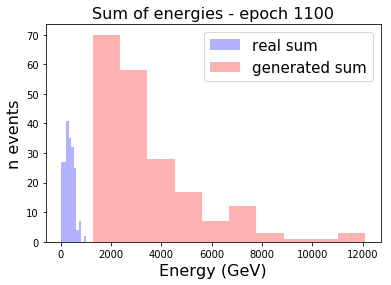

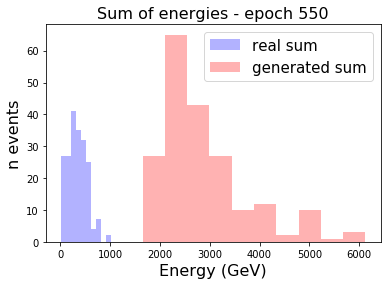

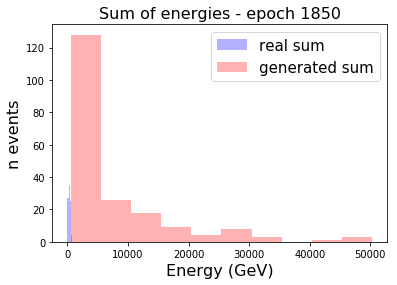

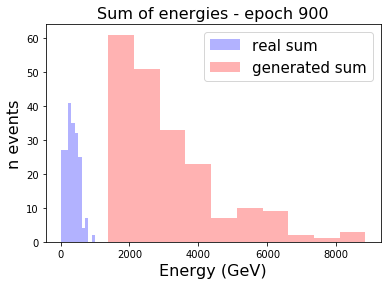

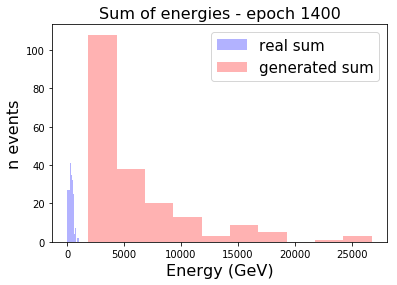

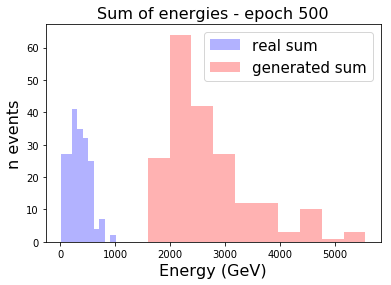

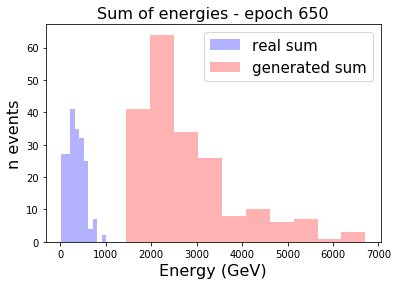

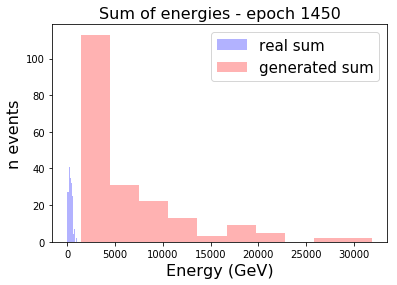

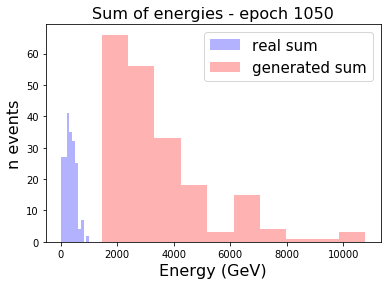

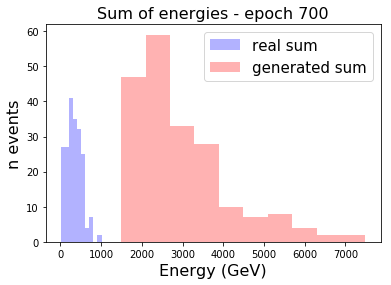

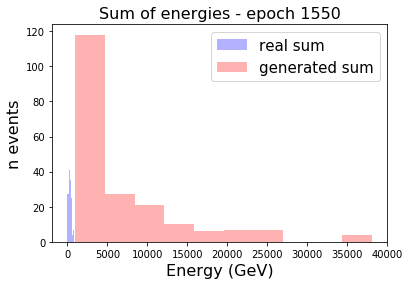

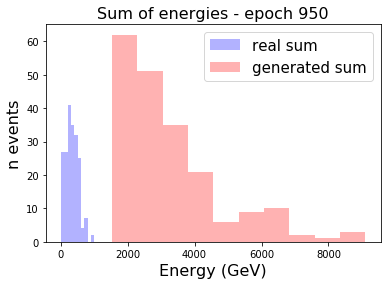

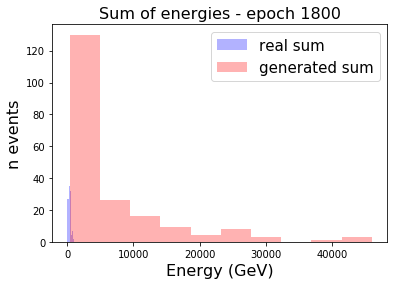

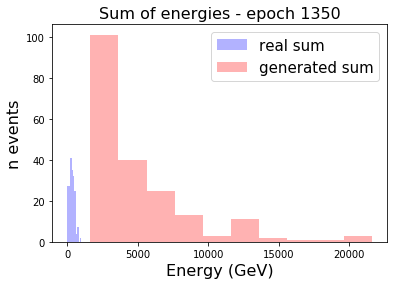

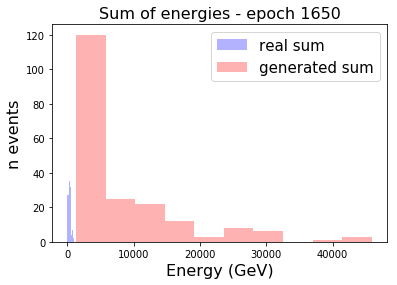

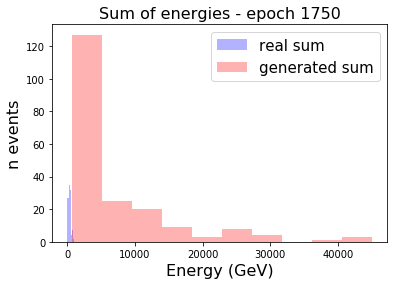

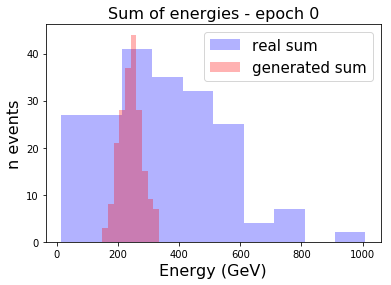

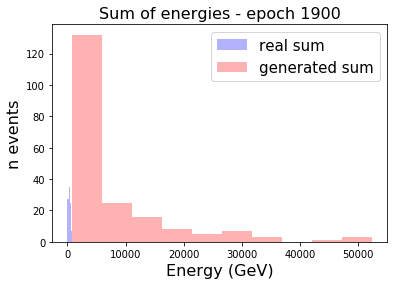

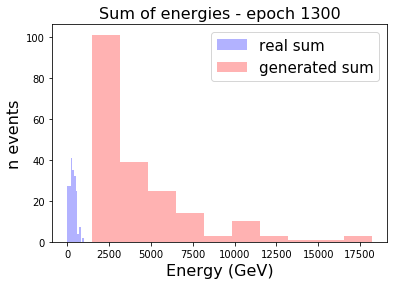

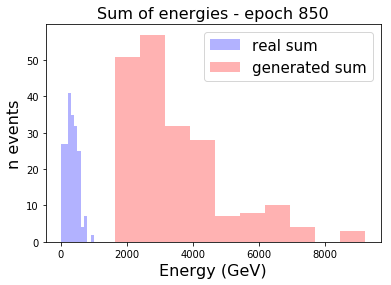

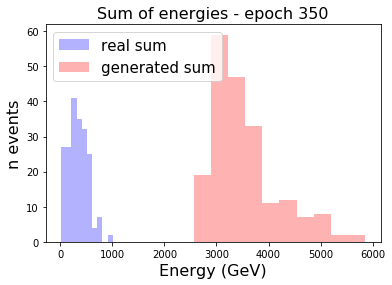

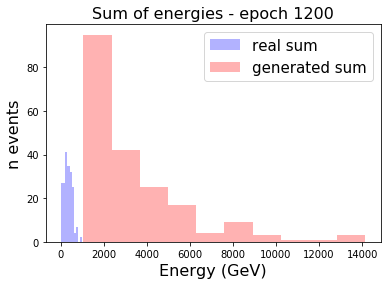

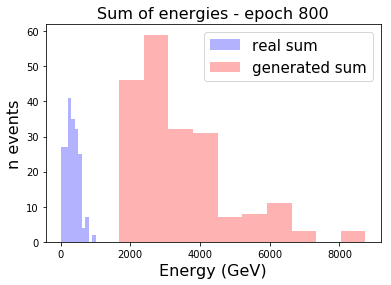

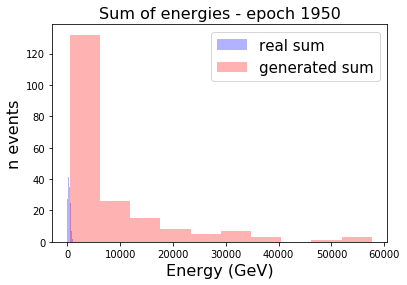

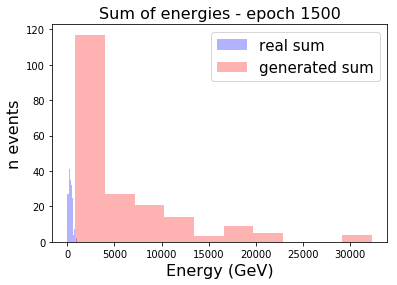

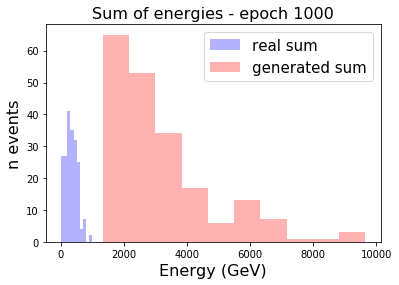

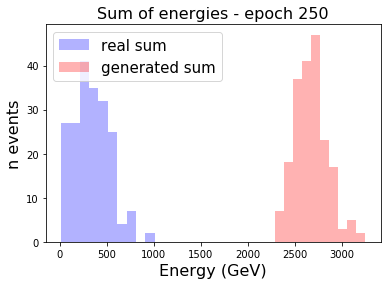

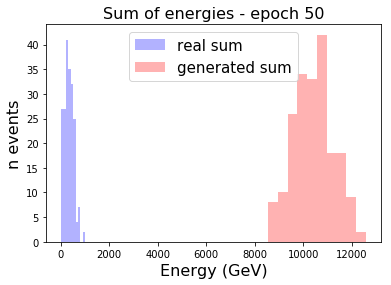

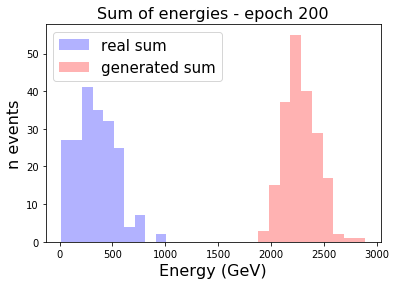

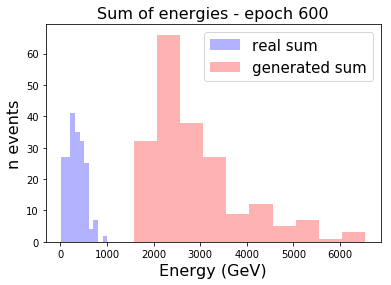

In [11]:
plotHist(all_g_weight2, gen_model2)

Using TensorFlow backend.
/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


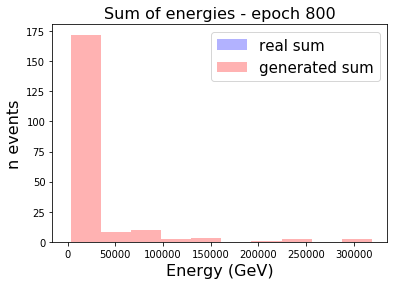

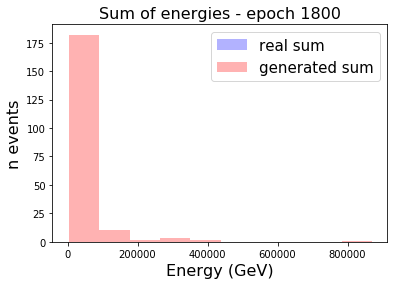

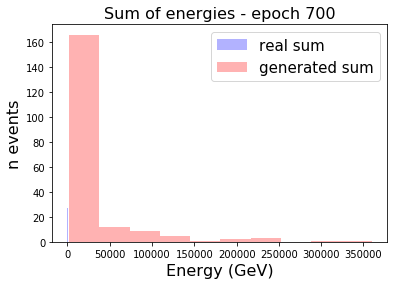

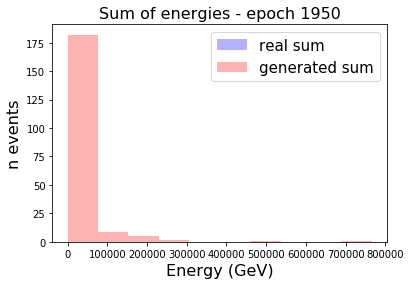

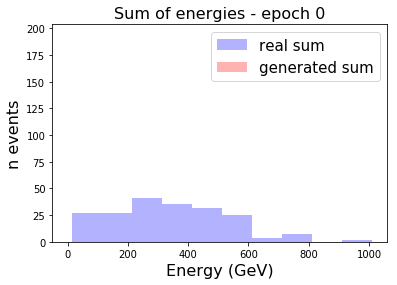

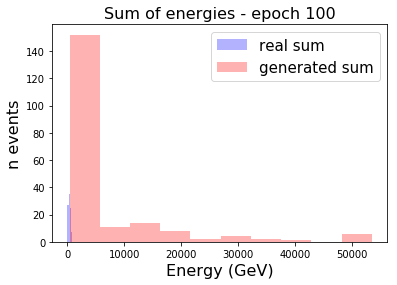

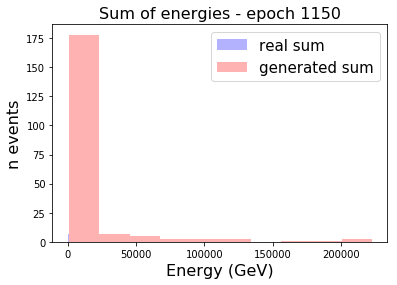

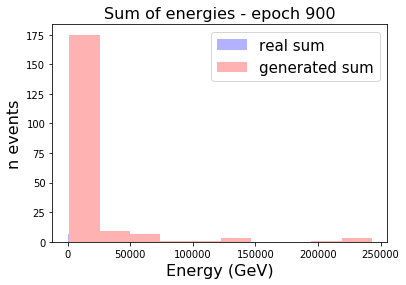

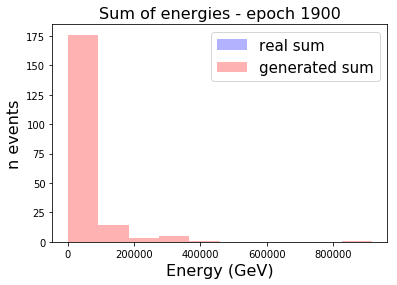

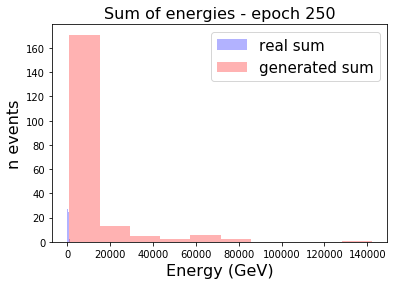

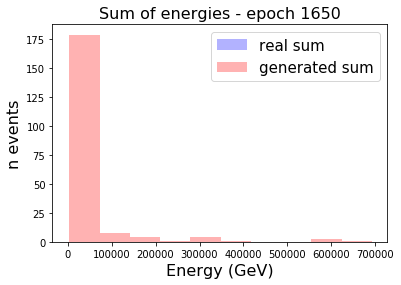

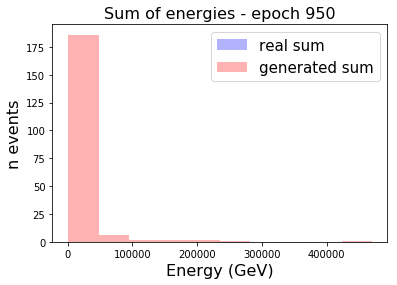

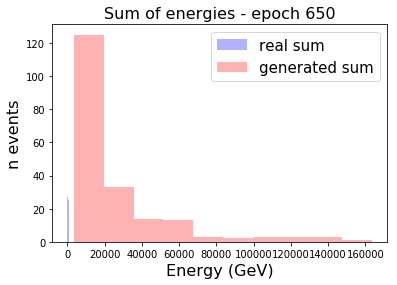

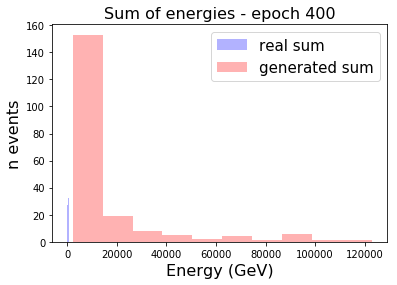

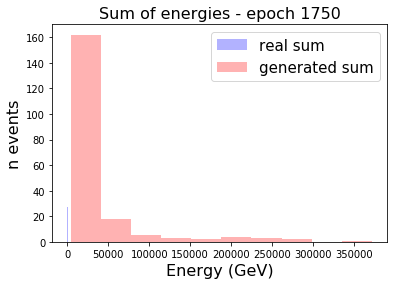

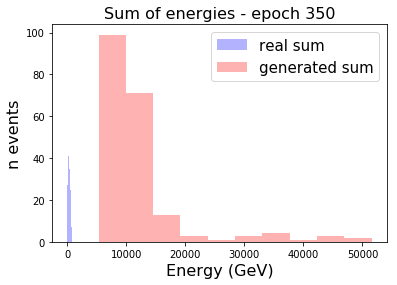

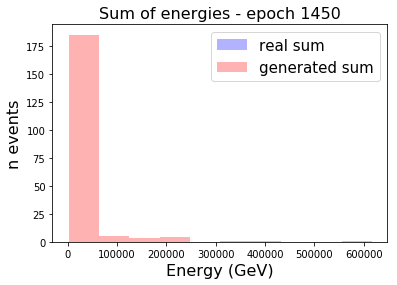

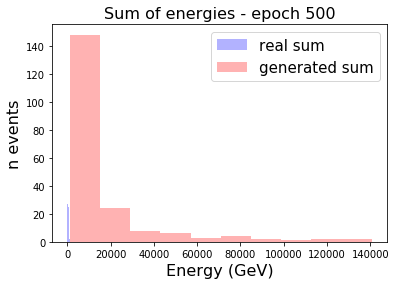

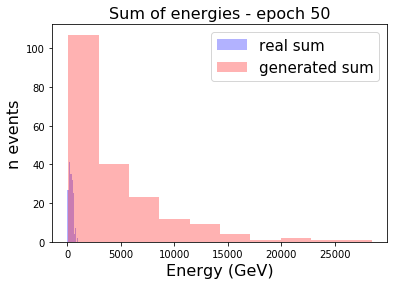

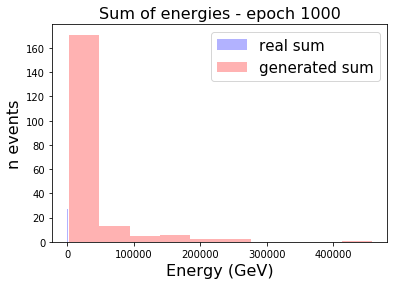

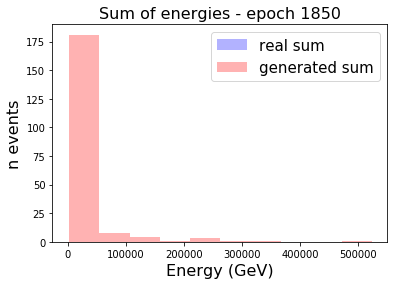

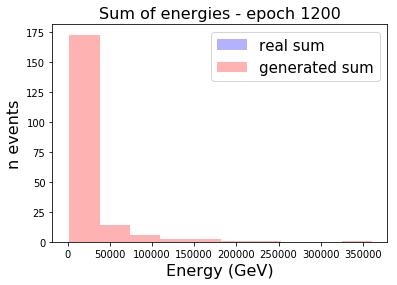

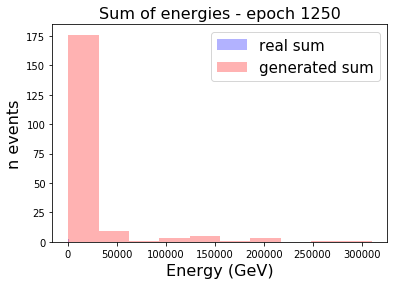

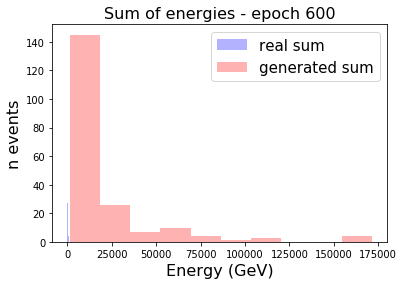

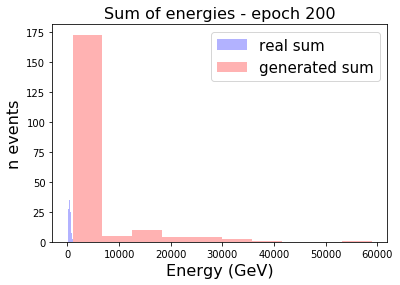

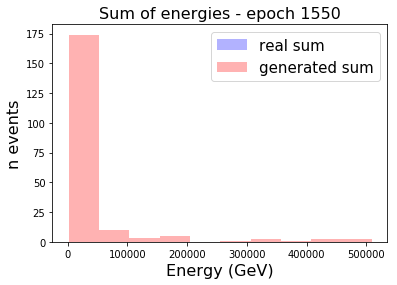

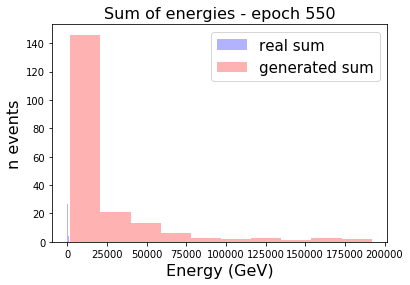

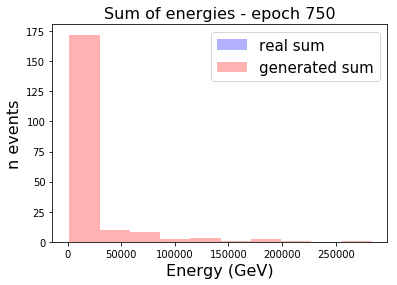

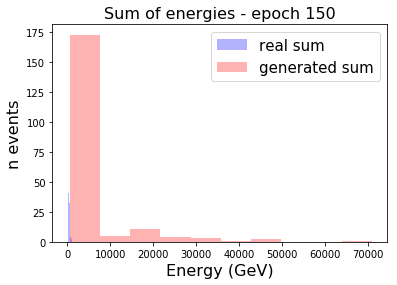

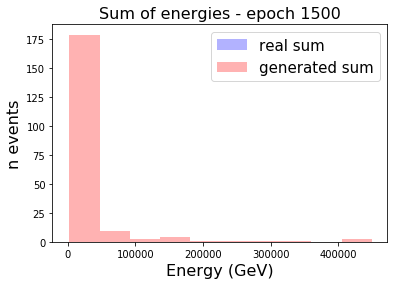

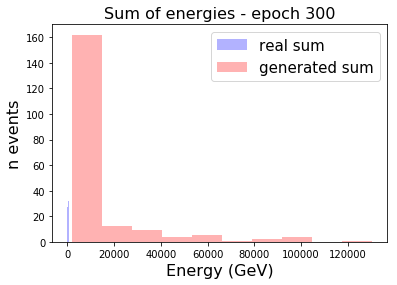

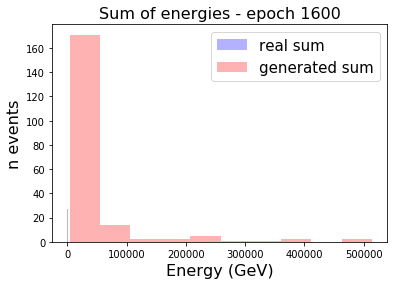

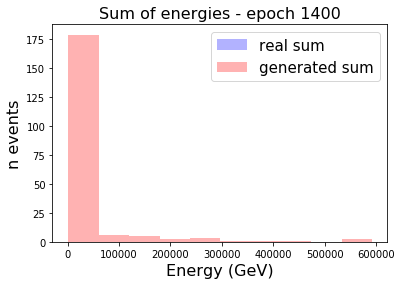

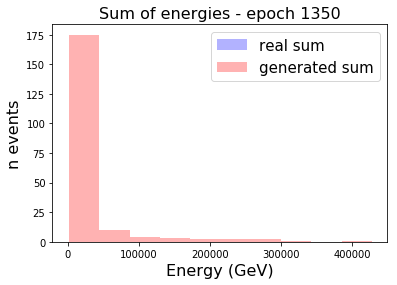

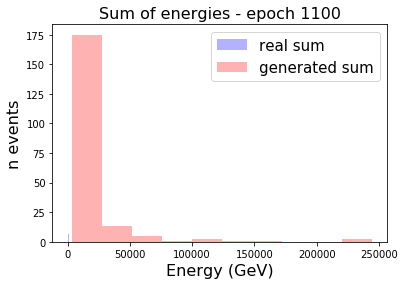

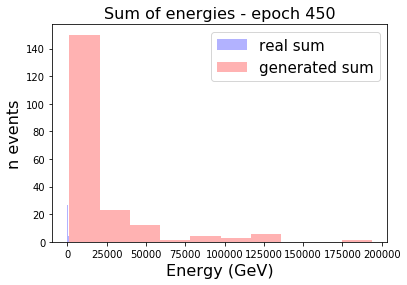

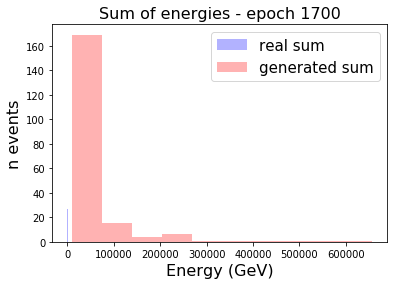

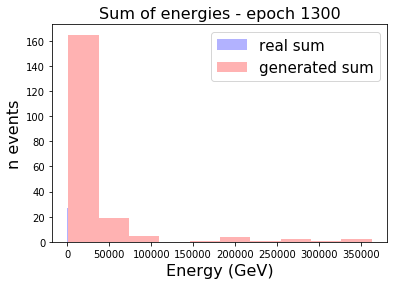

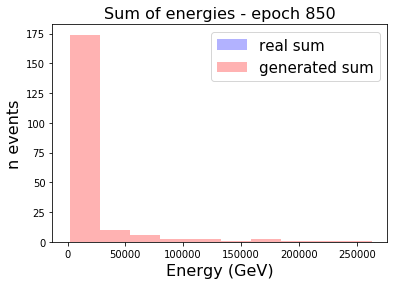

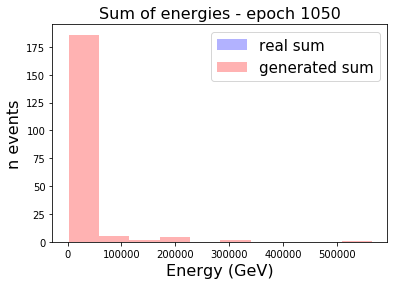

In [10]:

g = loadModel(gen_model)

for w in glob.glob(all_g_weight):
    epoch = w.split('/')[-1].split('_')[3]
    g.load_weights(w)
    generated_images = g.predict(noise)
    generated_images = generated_images.squeeze()
    gen_sum = np.sum(generated_images, axis=(1, 2, 3))
    plotHistogram(inp_sum, gen_sum, epoch, bins = 10)